In [ ]:
import json                     # module pour load le file
import re                       # module pour retourner les hasthtags
from textblob import TextBlob   # module pour analyser le sentiment du tweet
import pandas as pd             # module pour visualiser et comparer les tweets
import matplotlib.pyplot as plt

# Data utilisé pour la création des dictionnaires pour compter le nombres x de y dans les tweets
file = open("sample2.json","r")
data =json.load(file)
file.close()

# Data utilisé pour analyser visuellement les différentes caractéristiques d'un tweet
data2 = pd.read_json("sample2.json")
df_data = pd.DataFrame(data2)

In [ ]:
class Tweet :
    def __init__(self,id_tweet,location_tweet,creation_tweet,retweet_count,tweet_language,tweet_text) :
        self.id = id_tweet
        self.location = location_tweet
        self.created = creation_tweet
        self.retweet = retweet_count
        self.language = tweet_language
        self.text = tweet_text
    
    def __str__(self):
        return f"Tweet id : {self.id}\nAuthor Location : {self.location} \nTweet Creation : {self.created} \nNumber of Retweets : {self.retweet} \nTweet Language : {self.language} \nTweet Text : {self.text}"
    
    def get_author(self):
        id_tweet = self.id
        return id_tweet
    
    def get_text(self):
        return f"The text of the tweet : {self.text}"
    
    def get_hashtags(self):
        return re.findall(r"#(\w+)", self.text)

    def get_mention(self):
        return re.findall(r"@(\w+)", self.text)
    
    def get_sentiment(self):
        text = TextBlob(self.text)
        text_polarity = text.sentiment.polarity
        if text_polarity > 0 :
            return "Positive"
        elif text_polarity < 0 :
            return "Negative"
        else :
            return "Neutral" 


#instance/ objets de la class
tweets = [Tweet(tweet["id"],tweet["AuthorLocation"],tweet["CreatedAt"],tweet["RetweetCount"],tweet["TweetLanguage"],tweet["TweetText"]) for tweet in data]

In [60]:
# for the Top K Hashtags -> 2 functions

# The first one : all_hashtag() : return all the hashtags of the json file
def all_hashtag():
    l = []
    for tweet in tweets:
        if tweet.get_hashtags()== [] :
            continue
        else :
            x = tweet.get_hashtags()
            for hashtag in x :
                l.append(hashtag)
                
    return l
    
#The second one : top_hashtag(k) : return the top k (index entered by the user) hashthag by using the all_hashtag function
def top_hashtag(k):
    hashtag = all_hashtag()               
    hashtag_count = {}                            # initiate dictionnary for counting each occurence of hashtags
    for e in hashtag :                            
        if e in hashtag_count :                   # checking if e is in hashtag
            hashtag_count[e] += 1                 # if yes we add 1 to it, so the count is updated
        else :
            hashtag_count[e] = 1                  # if not, we create a new key, and a count equal to 1

    hashtag_count = dict(sorted(hashtag_count.items(),key = lambda x : x[1], reverse=True)) # ascending values
    temp = list(hashtag_count.items())[:k]        # converting to list for slicing to get the first element till index k
    top_k_hashtag = dict(temp)                    # reverting into dictionnary 

    
    x_hashtag = list(top_k_hashtag.keys())
    y_occurence = list(top_k_hashtag.values())

    plt.bar(x_hashtag,y_occurence)
    plt.xlabel("Hashtag")
    plt.ylabel("Occurence")

    plt.xticks(fontsize=6)
    plt.show()

    return top_k_hashtag                          

#########################################################################################################################

#for the top K users -> 2 functions 

# The first one : all_users() : return all the users of the json file
def all_users():
    l = []
    for tweet in tweets:
        user = tweet.get_author()
        l.append(user)
                
    return l
    
def top_users(k):
    users = all_users()
    user_ntweet = {}
    for user in users :
        if user in user_ntweet :
            user_ntweet[user] += 1
        else :
            user_ntweet[user] = 1

    user_ntweet = dict(sorted(user_ntweet.items(),key = lambda x : x[1], reverse=True))
    temp = list(user_ntweet.items())[:k]
    top_k_users = dict(temp)

    x_user = list(top_k_users.keys())
    y_occurence = list(top_k_users.values())

    plt.bar(x_user,y_occurence)
    plt.xlabel("User")
    plt.ylabel("Occurence")

    plt.xticks(fontsize=7*6/k)
    plt.show()


    return top_k_users


#########################################################################################################################

# for the top K mentions -> 2 functions 

# The first one : all_mentions() : return all the mentions of the json file
def all_mentions():
    l = []
    for tweet in tweets:
        if tweet.get_mention()== [] :   # verify if the value is "[]" <- no value ; in this case we pass to next tweet
            continue
        else :
            mentions = tweet.get_mention()  # we put the mentions of the tweet into a variable
            for mention in mentions :       # we take each mention (they may be separated in concatenated list for example : [[mention]])
                l.append(mention)           # we put it in our final list
                
    return l

def top_mention(k):
    mentions = all_mentions()
    mention_ntweet = {}
    for mention in mentions :
        if mention in mention_ntweet :
            mention_ntweet[mention] += 1
        else :
            mention_ntweet[mention] = 1

    mention_ntweet = dict(sorted(mention_ntweet.items(),key = lambda x : x[1], reverse=True))
    temp = list(mention_ntweet.items())[:k]
    top_k_mentions = dict(temp)

    x_mention = list(top_k_mentions.keys())
    y_occurence = list(top_k_mentions.values())

    plt.bar(x_mention,y_occurence)
    plt.xlabel("Mention",)
    plt.ylabel("Occurence")

    plt.xticks(fontsize=7)
    plt.show()

    return top_k_mentions

#########################################################################################################################

def top_topics():
    pass

#########################################################################################################################
#########################################################################################################################

def all_tweet_mention(mention):
    return df_data[df_data["TweetText"].str.contains(f"@{mention}",regex=False)]

def all_tweet_hashtag(hashtag):
    return df_data[df_data["TweetText"].str.contains(f"#{hashtag}",regex=False)]



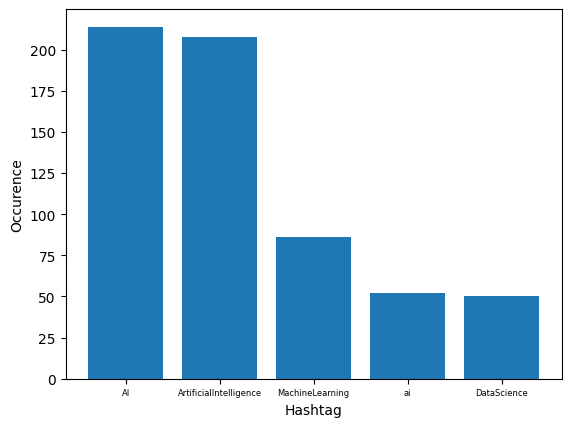

{'AI': 214,
 'ArtificialIntelligence': 208,
 'MachineLearning': 86,
 'ai': 52,
 'DataScience': 50}

In [64]:
# Test for Top k hashtags
all_hashtag()
top_hashtag(5)

In [ ]:
# Test for Top k users
all_users()
top_users(4)


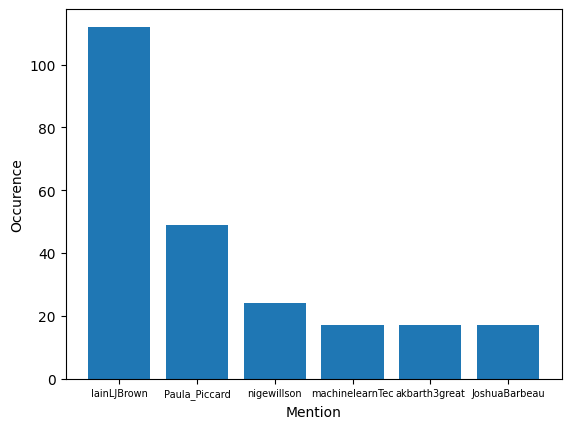

{'IainLJBrown': 112,
 'Paula_Piccard': 49,
 'nigewillson': 24,
 'machinelearnTec': 17,
 'akbarth3great': 17,
 'JoshuaBarbeau': 17}

In [59]:
# Test for Top k mentions
all_mentions()
top_mention(7)

In [ ]:
all_tweet_hashtag("DataScience")

In [42]:
all_tweet_mention("SpirosMargaris")

,id,AuthorLocation,CreatedAt,RetweetCount,TweetLanguage,TweetText
142,1415745098394996736,,2021-07-15T18:48:29Z,170,en,RT @DeepLearn007: Amazing #AI Translates Menta...
200,1415926488801718272,Kenya,2021-07-16T06:49:16Z,0,en,Why Global #ArtificialIntelligence \n\nis the ...
367,1416485301925539840,"Irvine, CA",2021-07-17T19:49:47Z,1,en,RT @SpirosMargaris: Researchers at @facebookai...
448,1416757077003931648,"Austin, TX",2021-07-18T13:49:43Z,2,en,RT @SpirosMargaris: What are the Implications ...
449,1416757074030174208,,2021-07-18T13:49:43Z,2,en,RT @SpirosMargaris: What are the Implications ...
457,1416787435535618048,U.K.,2021-07-18T15:50:21Z,12,en,RT @SpirosMargaris: What are the Implications ...
521,1417074345927745536,All Over the World,2021-07-19T10:50:26Z,4,en,RT @SpirosMargaris: Artificial Intelligence st...
943,1418614895818403840,"Dallas, TX",2021-07-23T16:52:02Z,0,en,As the presence of #AI and #automation increas...
1133,1419279456724791296,Northeast USA,2021-07-25T12:52:46Z,6,en,RT @SpirosMargaris: Good read\n\n#ArtificialIn...
1135,1419294395287982080,"Frankfurt on the Main, Germany",2021-07-25T13:52:07Z,25,en,RT @SpirosMargaris: What is #AI? \n\nEverythin...
